In [10]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [11]:
#Test set Image Processing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [18]:
#Loading Model
cnn = tf.keras.models.load_model('trained_plant1_disease_model.keras')

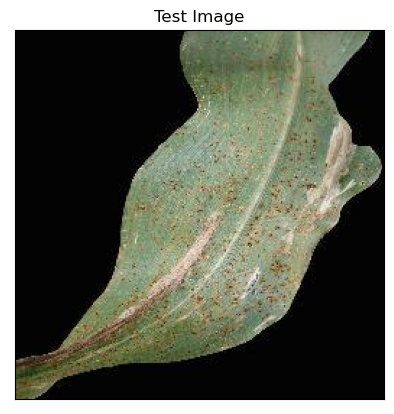

In [25]:
#Visualising and Performing Prediction on Single image
#Test Image Visualization
import cv2
image_path = "test\CornCommonRust1.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


In [26]:
#Testing Model
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 107ms/step


In [27]:
print(predictions)

[[6.14372268e-13 5.40175713e-14 1.17404255e-13 4.51785173e-17
  3.30085987e-16 2.10293783e-16 1.35490712e-17 1.61525099e-11
  1.00000000e+00 8.14261446e-14 2.84889539e-17 8.58269782e-18
  2.77940097e-16 9.93235714e-18 2.79087244e-18 1.76018228e-17
  1.36972904e-16 1.67105392e-15 2.69474466e-13 6.68085717e-15
  6.70727102e-12 7.81886270e-20 4.79287307e-17 5.61170152e-22
  1.63228481e-19 3.07287568e-19 2.84282687e-17 2.43462050e-20
  1.04655880e-19 1.24916597e-13 1.17334809e-10 1.26273462e-16
  1.32766866e-15 6.76383792e-23 5.56934023e-17 2.81081586e-21
  1.26175465e-20 3.54453748e-15]]


In [28]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

8


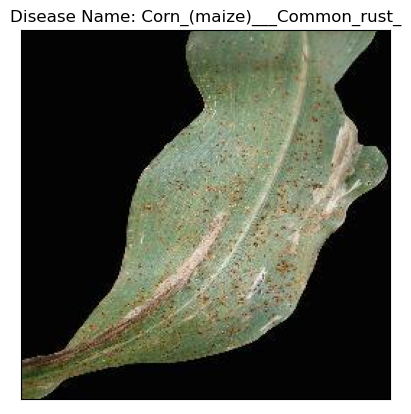

In [30]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [29]:
class_name = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
                    'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 
                    'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 
                    'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 
                    'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 
                    'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot',
                    'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 
                    'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 
                    'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 
                    'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 
                    'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 
                    'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 
                    'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',
                      'Tomato___healthy']